In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Dense,AveragePooling2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
import numpy

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train = X_train.reshape(-1,28,28,1).astype('float32')/255.0
X_test = X_test.reshape(-1,28,28,1).astype('float32')/255.0
y_train = tf.one_hot(y_train,10).numpy()
y_test = tf.one_hot(y_test,10).numpy()

I0000 00:00:1766988632.344660      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [5]:
input = X_train.shape[1:]
input

(28, 28, 1)

In [18]:
print(X_train.shape)

(60000, 28, 28, 1)


# LeNET Architecture
* The LeNet convolutional neural network architecture was primarily created by Yann LeCun.
* This architecture uses tanh activation function whereas nowadays every model uses relu.
* Total 5 trainable layers : Conv1, Conv2, Dense Layer 1, Dense Layer 2 and Output Layer
* uses kernel size (5x5) where at conv1 layer the no. of fliters are 6 and at conv2 layer the number of filters are 16.
* uses AveragePooling with pool size of (2x2) and stride 2.
* this pooling layer is not trainable. Architecture has 2 pooling layers.

In [7]:
model = Sequential()

model.add(Conv2D(6,kernel_size=(5,5),padding='valid',activation='tanh',input_shape=input))
model.add(AveragePooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(16,kernel_size=(5,5),padding='valid',activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2),strides=2))

model.add(Flatten())

model.add(Dense(120,activation='tanh'))
model.add(Dense(84,activation='tanh'))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
history= model.fit(X_train,y_train,epochs=10,batch_size=128,verbose=1,validation_split=0.15)

Epoch 1/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9943 - loss: 0.0185 - val_accuracy: 0.9856 - val_loss: 0.0518
Epoch 2/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9950 - loss: 0.0176 - val_accuracy: 0.9849 - val_loss: 0.0496
Epoch 3/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9961 - loss: 0.0144 - val_accuracy: 0.9879 - val_loss: 0.0446
Epoch 4/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9965 - loss: 0.0123 - val_accuracy: 0.9854 - val_loss: 0.0530
Epoch 5/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9966 - loss: 0.0115 - val_accuracy: 0.9863 - val_loss: 0.0479
Epoch 6/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9979 - loss: 0.0080 - val_accuracy: 0.9863 - val_loss: 0.0531
Epoch 7/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9976 - loss: 0.0081 - val_accuracy: 0.9848 - val_loss: 0.0568
Epoch 8/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9976 - loss: 0.0080 - val_accuracy: 0.

In [11]:
test_loss,test_accuracy = model.evaluate(X_test,y_test)
print(test_accuracy)
print(test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9842 - loss: 0.0550
0.9864000082015991
0.046315282583236694


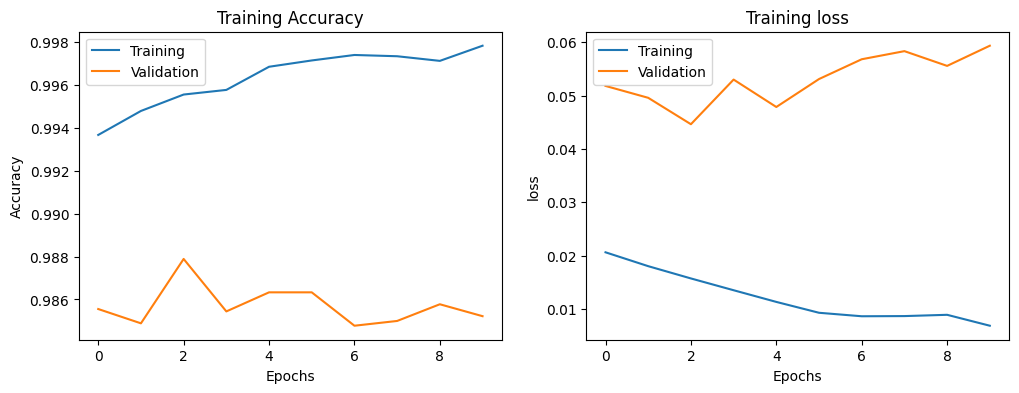

In [13]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()